In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [2]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\all_top+front_imputed.csv")
df_frame = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\joinned_label+track_top+front.csv")

In [3]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [4]:
# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Add relevant data to the new DataFrame
new_df["Behavior"] = df['Behavior']

new_df['Client_Mouth_X_top'] = df['Client_Mouth']
new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']
new_df['Client_Mouth_Z_front']= df['Client_Mouth_Front.1']

new_df['Client_S1_X_top'] = df['Client_Spine_1']
new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']
new_df['Client_S1_Z_front']= df['Client_Spine_head_Front.1']

new_df['Client_S2_X_top'] = df['Client_Spine_2']
new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']
new_df['Client_S2_Z_front']= df['Client_Spine_mid_Front.1']

new_df['Client_Tail_X_top'] = df['Client_Tail']
new_df['Client_Tail_Y_top'] = df['Client_Tail.1']
new_df['Client_Tail_Z_front']= df['Client_Tail_Front.1']

new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']
new_df['Cleaner_Mouth_Z_front']= df['Cleaner_Mouth_Front.1']

new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']
new_df['Cleaner_Spine1_Z_front']= df['Cleaner_Spine1_Front.1']

new_df['Cleaner_Spine2_X_top'] = df['Cleaner_Spine2']
new_df['Cleaner_Spine2_Y_top'] = df['Cleaner_Spine2.1']
new_df['Cleaner_Spine2_Z_front']= df['Cleaner_Spine2_Front.1']

new_df['Cleaner_Tail_X_top'] = df['Cleaner_Tail']
new_df['Cleaner_Tail_Y_top'] = df['Cleaner_Tail.1']
new_df['Cleaner_Tail_Z_front']= df['Cleaner_Tail_Front.1']

new_df["Frame"] = df_frame['Frame'] #add column with frames

In [5]:
# Create a new column in new_df to store the centroid for each row
new_df['Client_Centroid_X'] = new_df[['Client_Mouth_X_top', 'Client_S1_X_top', 'Client_S2_X_top', 'Client_Tail_X_top']].mean(axis=1)
new_df['Client_Centroid_Y'] = new_df[['Client_Mouth_Y_top', 'Client_S1_Y_top', 'Client_S2_Y_top', 'Client_Tail_Y_top']].mean(axis=1)
new_df['Client_Centroid_Z'] = new_df[['Client_Mouth_Z_front', 'Client_S1_Z_front', 'Client_S2_Z_front', 'Client_Tail_Z_front']].mean(axis=1)

In [6]:
# Create a new column in new_df to store the centroid for each row
new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top', 'Cleaner_Spine2_X_top', 'Cleaner_Tail_X_top']].mean(axis=1)
new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top', 'Cleaner_Spine2_Y_top', 'Cleaner_Tail_Y_top']].mean(axis=1)
new_df['Cleaner_Centroid_Z'] = new_df[['Cleaner_Mouth_Z_front', 'Cleaner_Spine1_Z_front', 'Cleaner_Spine2_Z_front', 'Cleaner_Tail_Z_front']].mean(axis=1)

In [7]:
# Calculate the Euclidean distance between the two centroids for each row
new_df['Distance'] = np.sqrt(
    (new_df['Client_Centroid_X'] - new_df['Cleaner_Centroid_X'])**2 +
    (new_df['Client_Centroid_Y'] - new_df['Cleaner_Centroid_Y'])**2 +
    (new_df['Client_Centroid_Z'] - new_df['Cleaner_Centroid_Z'])**2
)

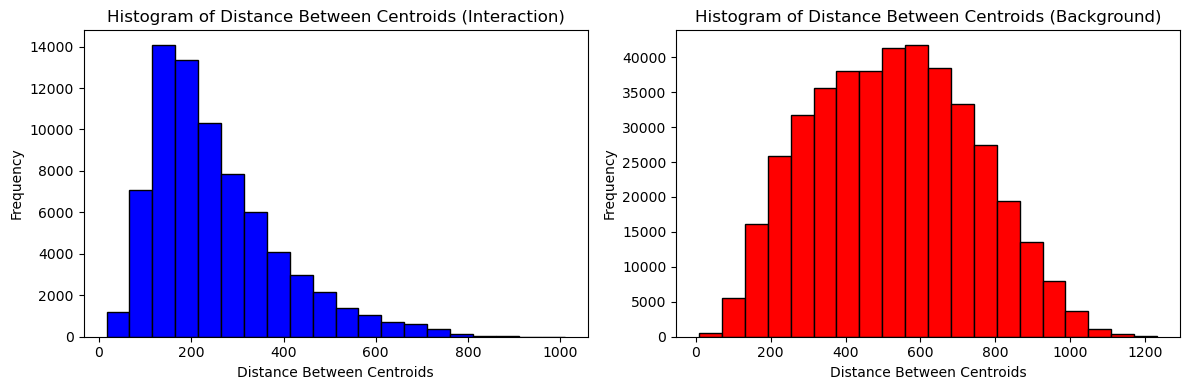

In [8]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first histogram (interaction)
ax1.hist(new_df[new_df['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue')
ax1.set_xlabel('Distance Between Centroids')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Distance Between Centroids (Interaction)')

# Plot the second histogram (non-interaction)
ax2.hist(new_df[new_df['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='red')
ax2.set_xlabel('Distance Between Centroids')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Distance Between Centroids (Background)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

In [9]:
new_df

,Behavior,Client_Mouth_X_top,Client_Mouth_Y_top,Client_Mouth_Z_front,Client_S1_X_top,Client_S1_Y_top,Client_S1_Z_front,Client_S2_X_top,Client_S2_Y_top,Client_S2_Z_front,...,Cleaner_Tail_Y_top,Cleaner_Tail_Z_front,Frame,Client_Centroid_X,Client_Centroid_Y,Client_Centroid_Z,Cleaner_Centroid_X,Cleaner_Centroid_Y,Cleaner_Centroid_Z,Distance
0,Background,1308.093,419.526,892.211,1346.876,426.760,886.200,1403.251,427.585,916.081,...,924.739,764.164,25251.0,1372.62300,420.90175,908.40425,1241.82950,915.11000,774.03575,528.586443
1,Background,1301.067,414.470,892.209,1340.332,426.760,874.595,1388.009,420.569,867.733,...,924.739,764.213,25252.0,1361.65450,417.70825,893.41550,1232.96375,912.63100,774.32400,525.064399
2,Background,1269.530,414.470,893.869,1298.572,426.760,875.479,1364.604,420.569,859.737,...,930.310,770.402,25255.0,1331.62850,417.70825,892.05250,1222.79100,915.67100,777.93775,522.335790
3,Background,1264.340,406.180,898.790,1298.261,426.760,875.766,1348.578,428.476,868.607,...,930.310,771.239,25256.0,1323.00275,418.13475,895.59625,1210.65650,915.71550,779.56200,523.136913
4,Background,1259.199,406.180,898.790,1292.935,426.186,875.766,1340.558,428.476,868.607,...,924.739,773.472,25257.0,1318.38100,420.44175,895.59625,1189.16800,916.90925,780.31950,525.799113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494449,Background,298.287,742.995,812.957,260.575,796.450,796.664,225.504,827.783,788.465,...,321.148,236.557,168761.0,245.62700,798.31925,796.56775,832.83700,256.28975,266.78150,958.793530
494450,Background,295.017,738.109,813.515,260.144,796.450,800.570,226.543,827.935,788.513,...,311.338,251.281,168762.0,244.94250,797.13625,797.71325,838.83125,244.95700,272.80350,965.989657
494451,Background,293.875,735.024,818.079,260.144,796.215,802.501,227.233,827.935,789.440,...,306.764,268.449,168765.0,245.58275,796.33775,801.22075,840.66450,239.70475,276.40400,969.224023
494452,Background,289.687,733.892,816.668,260.144,795.015,802.372,227.266,827.935,787.931,...,300.703,268.449,168766.0,244.51625,795.81475,800.45850,845.04000,232.80100,273.84250,977.209122


In [10]:
def detect_interactions(distances, min_consecutive=60, threshold=250):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [49]:
total_frames = 0
correctly_detected_event = 0
total = 0
correctly_frame_count = 0

# Initialize the "Interaction_Predictions" column with a default value
new_df["Interaction_Predictions"] = "Background"

interactions = detect_interactions(new_df["Distance"])

for interaction in interactions:
    
    start_frame, end_frame = interaction
    
    if end_frame - start_frame + 1 >= 15:
        total += 1  # Increment the total count for eligible interactions
        total_frames += end_frame - start_frame + 1
        selected_data = new_df.loc[start_frame:end_frame, "Behavior"]
        mode_value = stats.mode(selected_data).mode[0]
        
        if mode_value == "interaction":
            correctly_detected_event +=1
            correctly_frame_count += end_frame - start_frame + 1
            
            
        # Store the prediction in the new column
        new_df.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

        print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

Interaction detected from frame 1583 to 1807 (Duration: 225 frames) with a true Behavior of interaction
Interaction detected from frame 1999 to 2143 (Duration: 145 frames) with a true Behavior of interaction
Interaction detected from frame 2473 to 2700 (Duration: 228 frames) with a true Behavior of interaction
Interaction detected from frame 2818 to 2883 (Duration: 66 frames) with a true Behavior of interaction
Interaction detected from frame 5322 to 5437 (Duration: 116 frames) with a true Behavior of interaction
Interaction detected from frame 6838 to 6937 (Duration: 100 frames) with a true Behavior of interaction
Interaction detected from frame 6991 to 7093 (Duration: 103 frames) with a true Behavior of interaction
Interaction detected from frame 7994 to 8076 (Duration: 83 frames) with a true Behavior of interaction
Interaction detected from frame 8697 to 8799 (Duration: 103 frames) with a true Behavior of interaction
Interaction detected from frame 10298 to 10360 (Duration: 63 frame

C:\Users\raulo\AppData\Local\Temp\ipykernel_8004\3175785233.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\raulo\AppData\Local\Temp\ipykernel_8004\3175785233.py:19: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see 

In [50]:
print(f"There was {correctly_frame_count} frames correclty classified, and a total of {total_frames} frames classified as interaction.")
print(f"Making this a {correctly_frame_count/total_frames *100} % accuracy.")
print(f"There was a total of {correctly_detected_event} events detected correctly. With a total of {total} events detected.")

There was 34547 frames correclty classified, and a total of 50472 frames classified as interaction.
Making this a 68.44785227452846 % accuracy.
There was a total of 246 events detected correctly. With a total of 403 events detected.


In [53]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [54]:
new_df["Interaction_Predictions"].value_counts()

Background     459907
interaction     34547
Name: Interaction_Predictions, dtype: int64

## Random forest

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [56]:
data_minus_last = new_df.iloc[:407652]
data_only_last = new_df.iloc[407652:]

In [57]:
Y_data_minus_last = data_minus_last.iloc[:, -1:] 
X_data_minus_last = data_minus_last.iloc[:, 1:-1] 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_data_minus_last, Y_data_minus_last, test_size=0.2, random_state=1999)

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\raulo\AppData\Local\Temp\ipykernel_8004\516523741.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [60]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9992763488734346


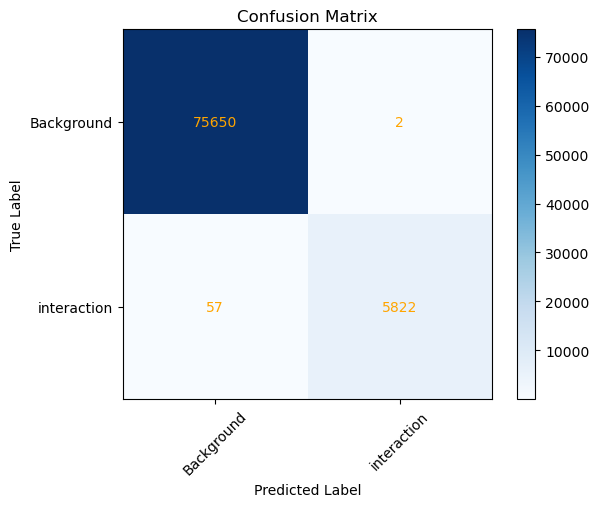

In [61]:
cm= confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = np.sort(Y_data_minus_last['Interaction_Predictions'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)


# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

### Independent data

In [62]:
Y_data_only_last = data_only_last.iloc[:, -1:] 
X_data_only_last = data_only_last.iloc[:, 1:-1] 

In [63]:
y_pred_ind = model.predict(X_data_only_last)
accuracy_ind = accuracy_score(Y_data_only_last, y_pred_ind)
print("Accuracy:", accuracy_ind)

Accuracy: 0.9373171125089284


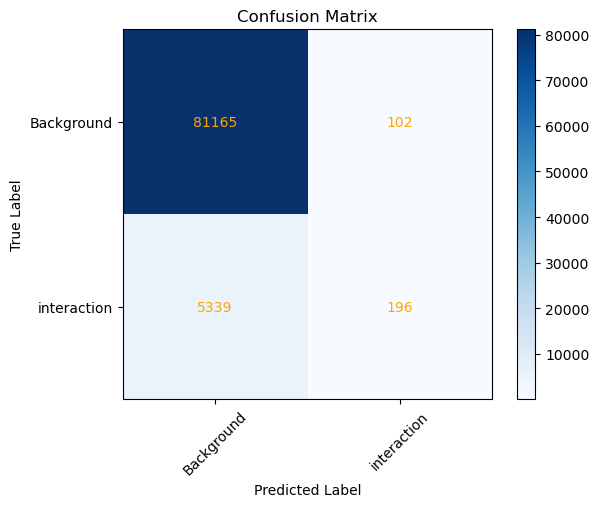

In [64]:
cm= confusion_matrix(Y_data_only_last, y_pred_ind)

# Define the class labels
class_labels = np.sort(Y_data_minus_last['Interaction_Predictions'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)


# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()